In [ ]:
!nvidia-smi

Tue Apr 23 10:52:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# !mkdir {HOME}/datasets
# %cd {HOME}/datasets

# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR_API_KEY")
# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# dataset = project.version(1).download("yolov8")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Datasets/final dataset/data.yaml' epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 264MB/s]
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Datasets/final dataset/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1713869673.a82a77cf5e77.2061.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1980.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1981.jpg  weights
P_curve.png					    train_batch1982.jpg


/content


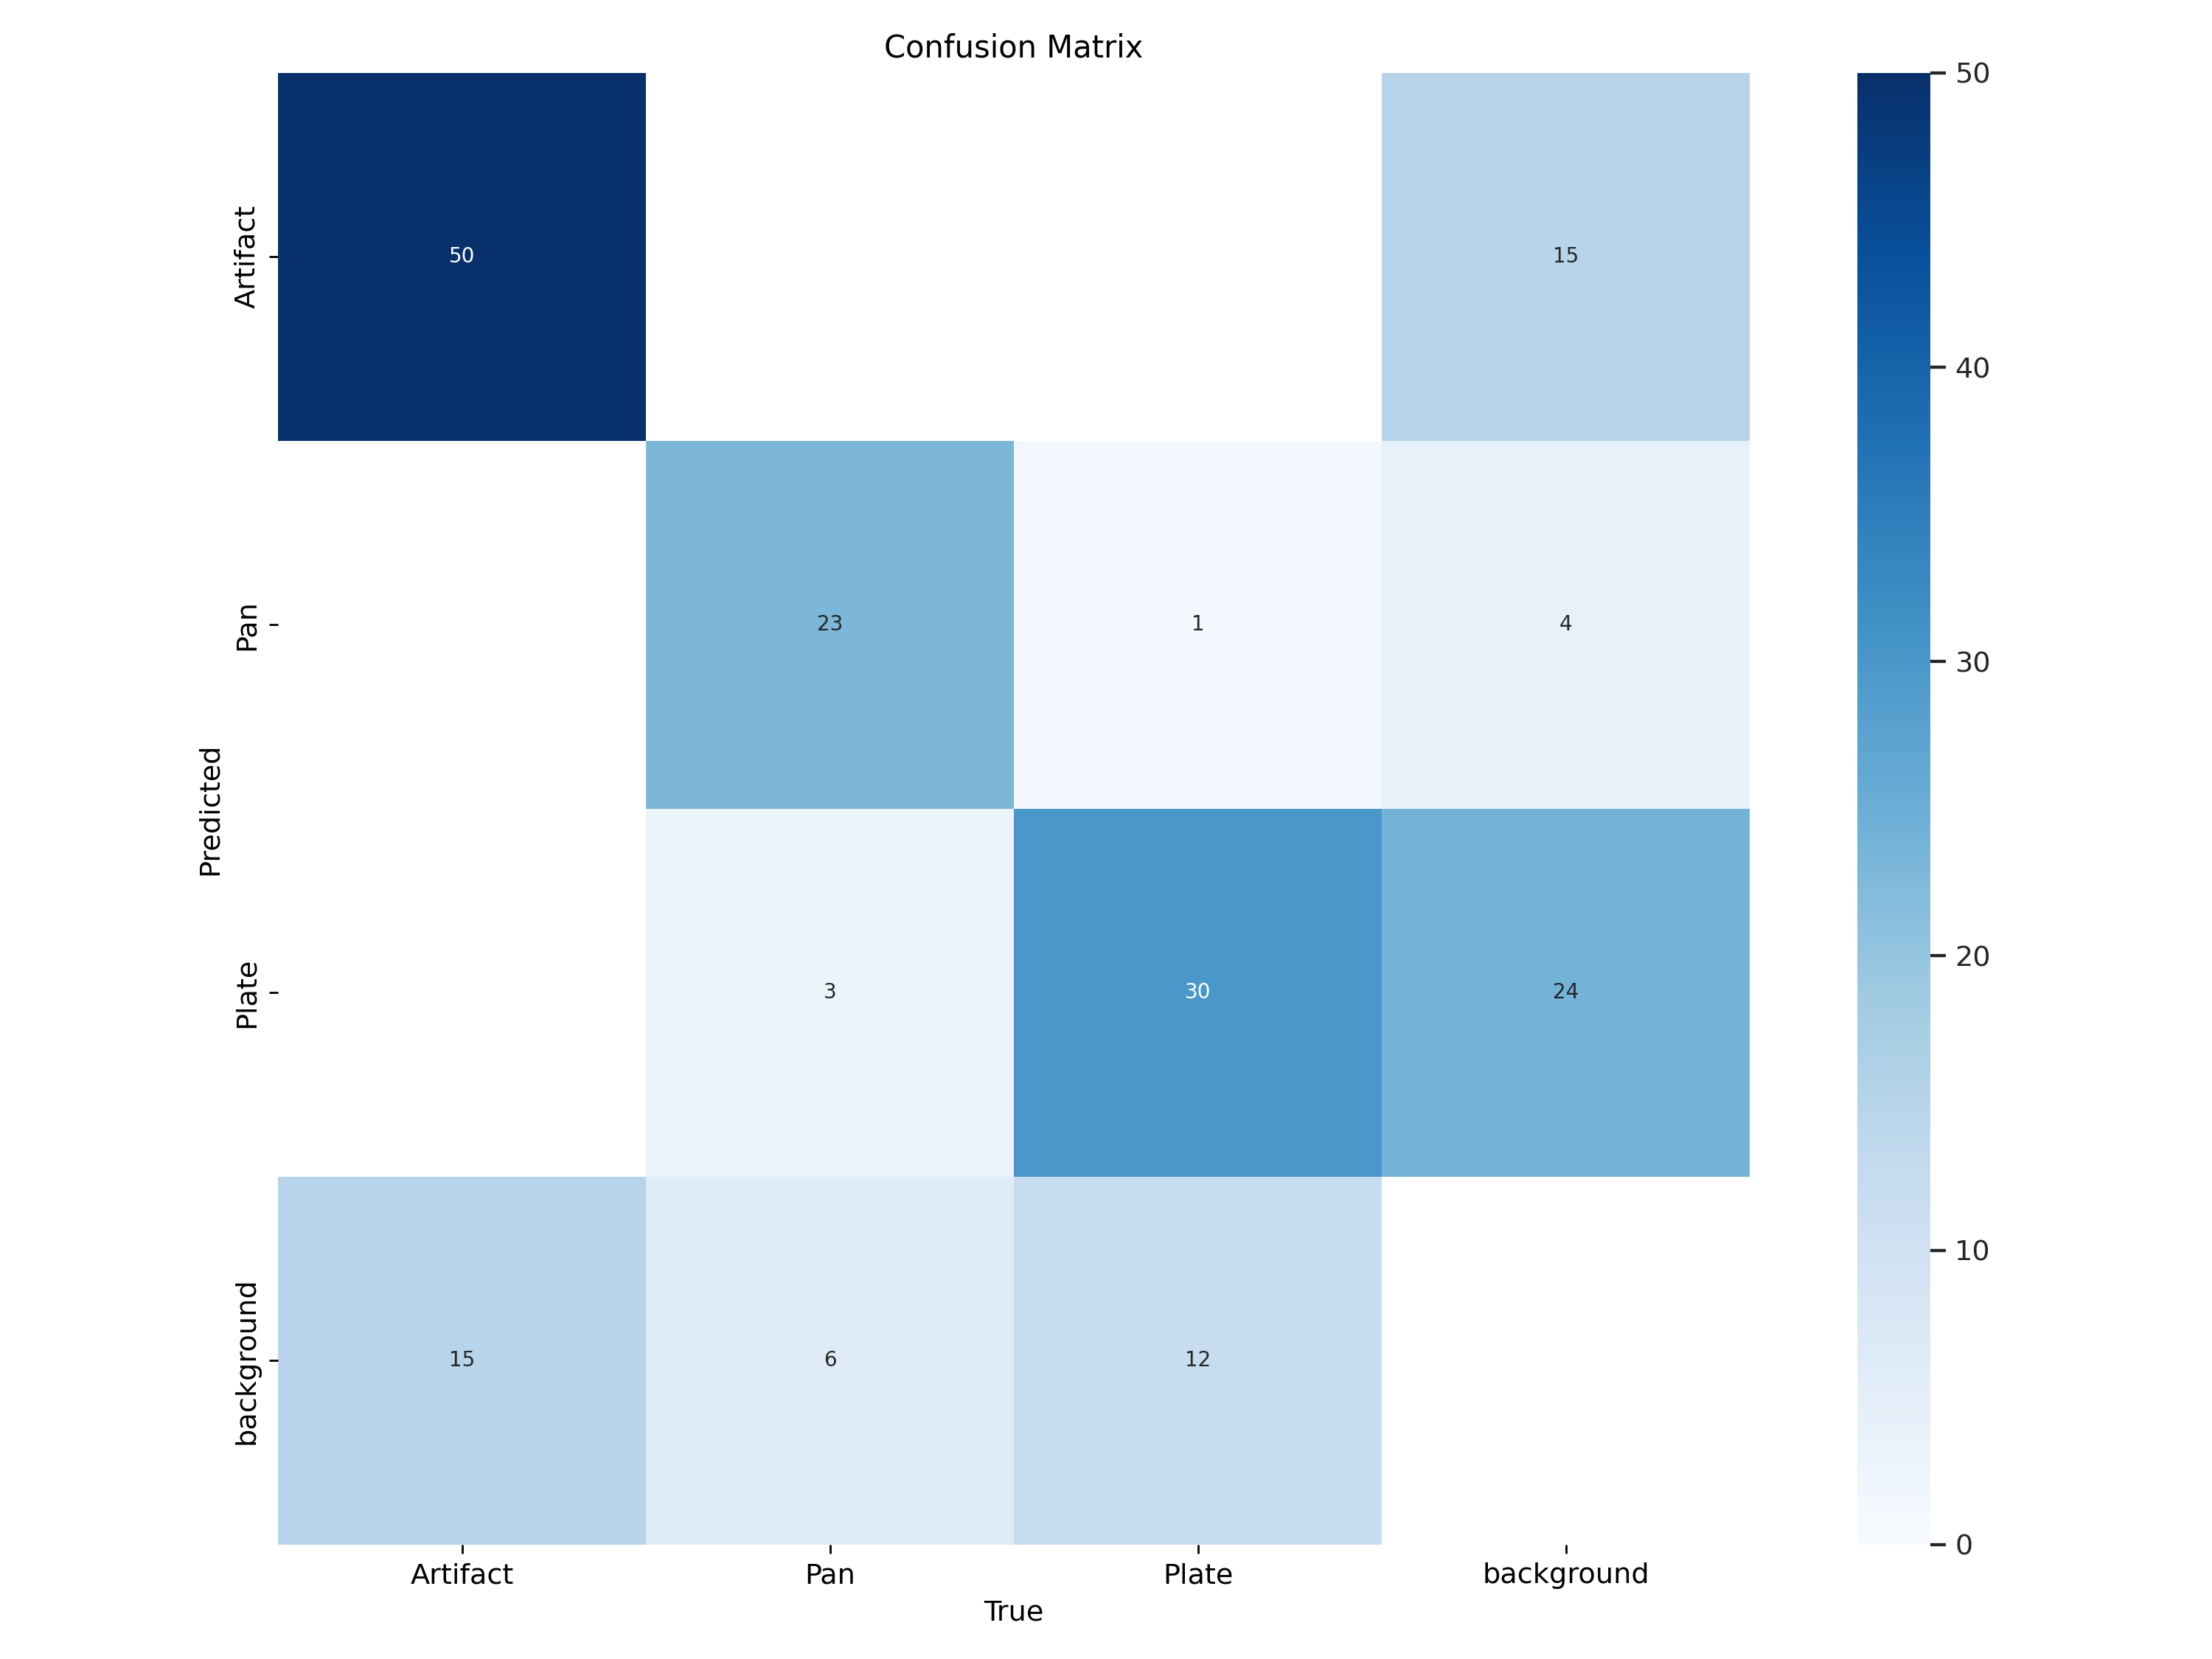

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


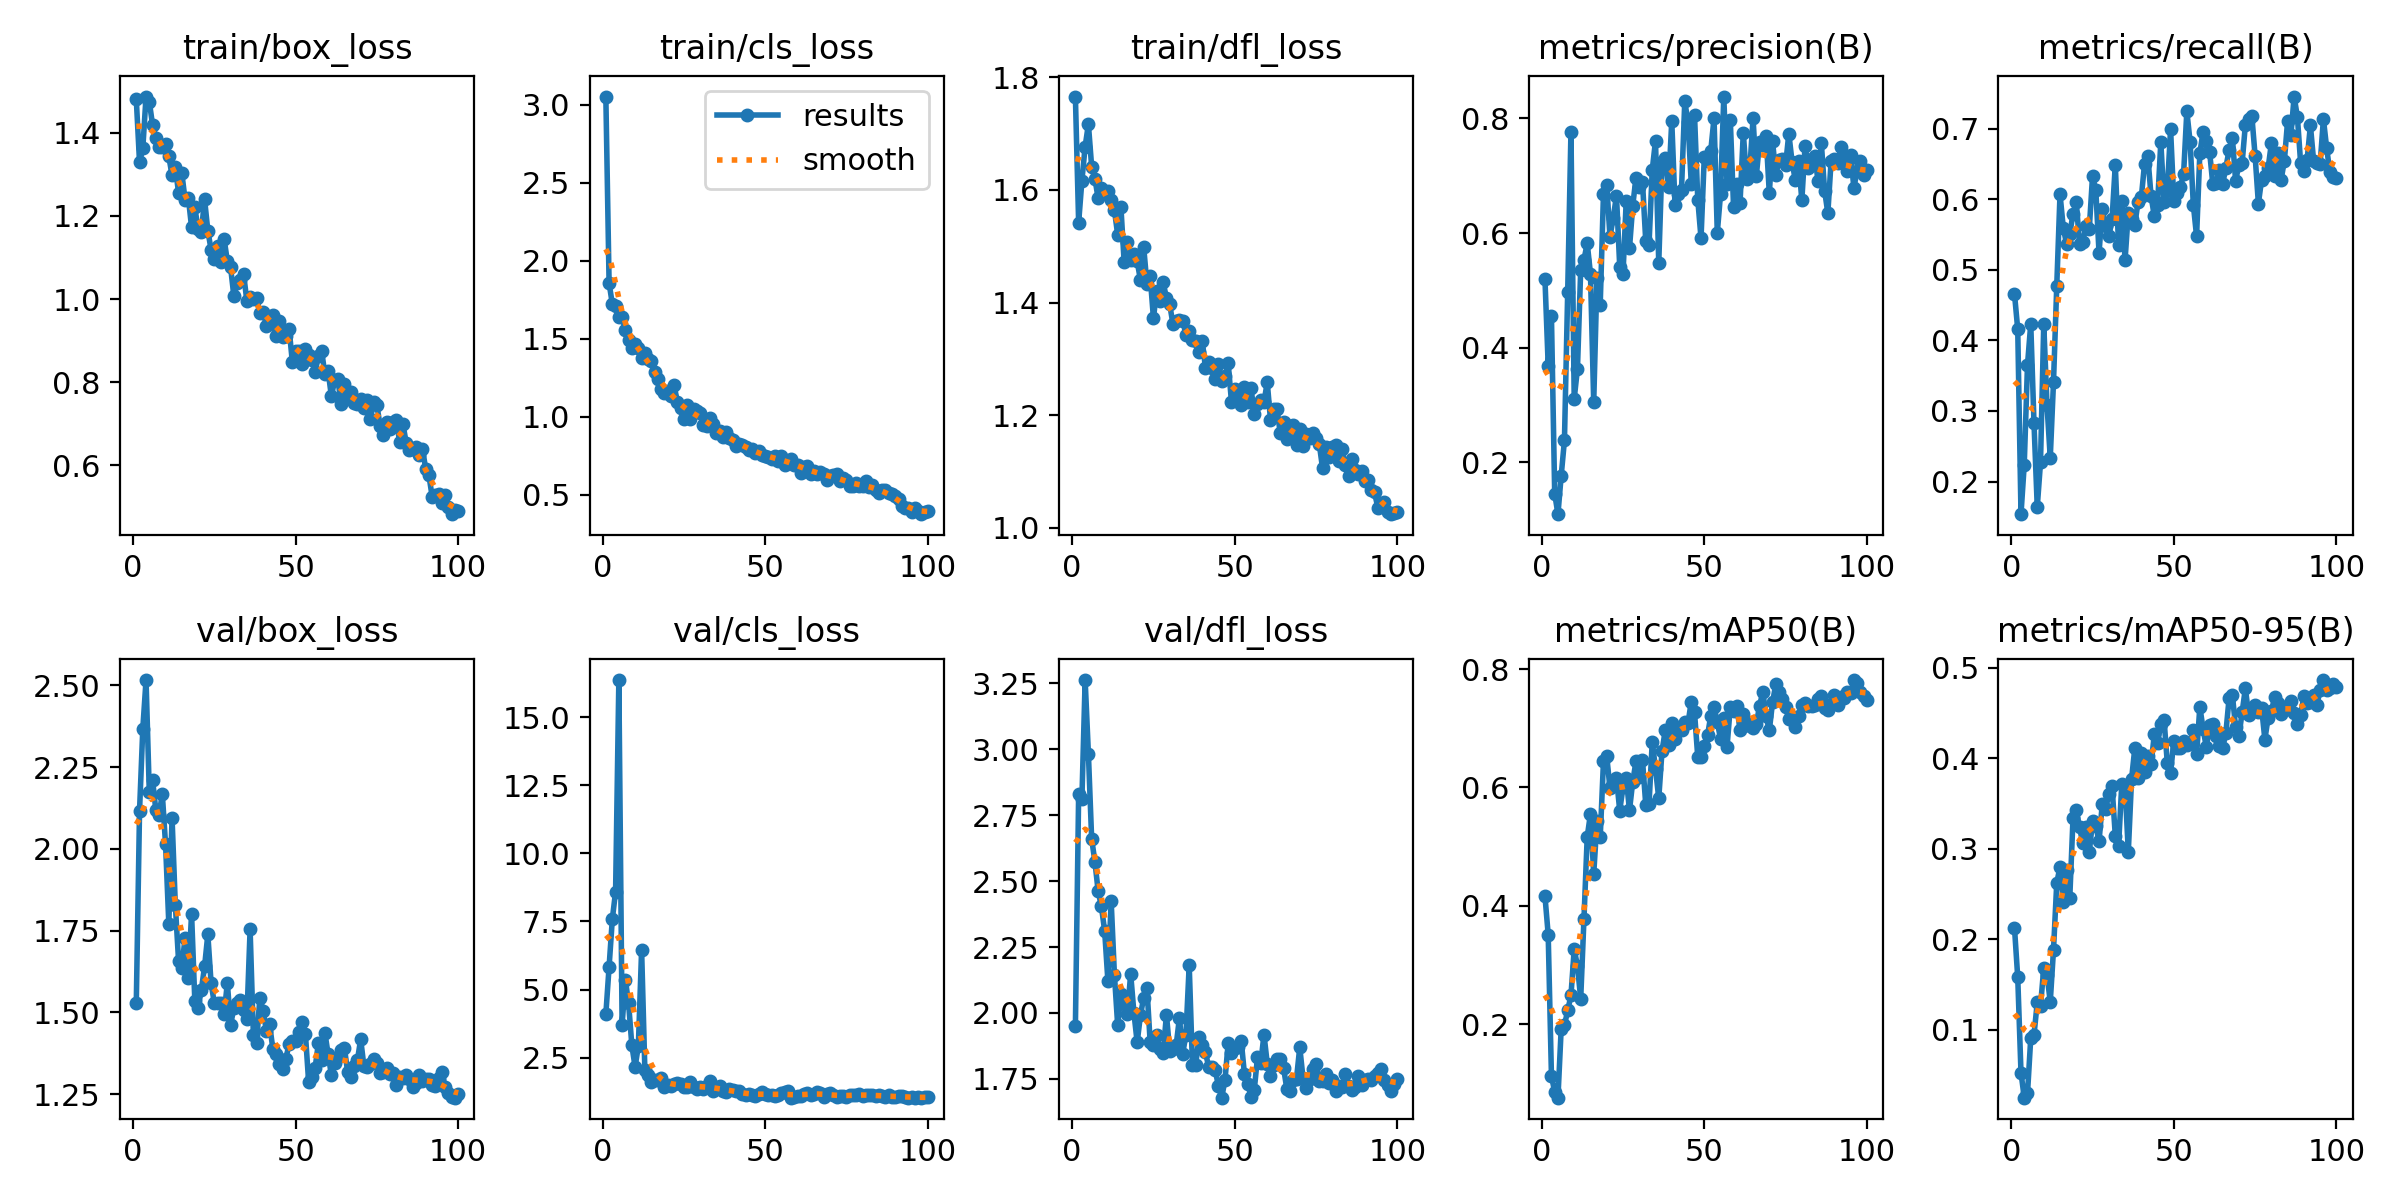

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


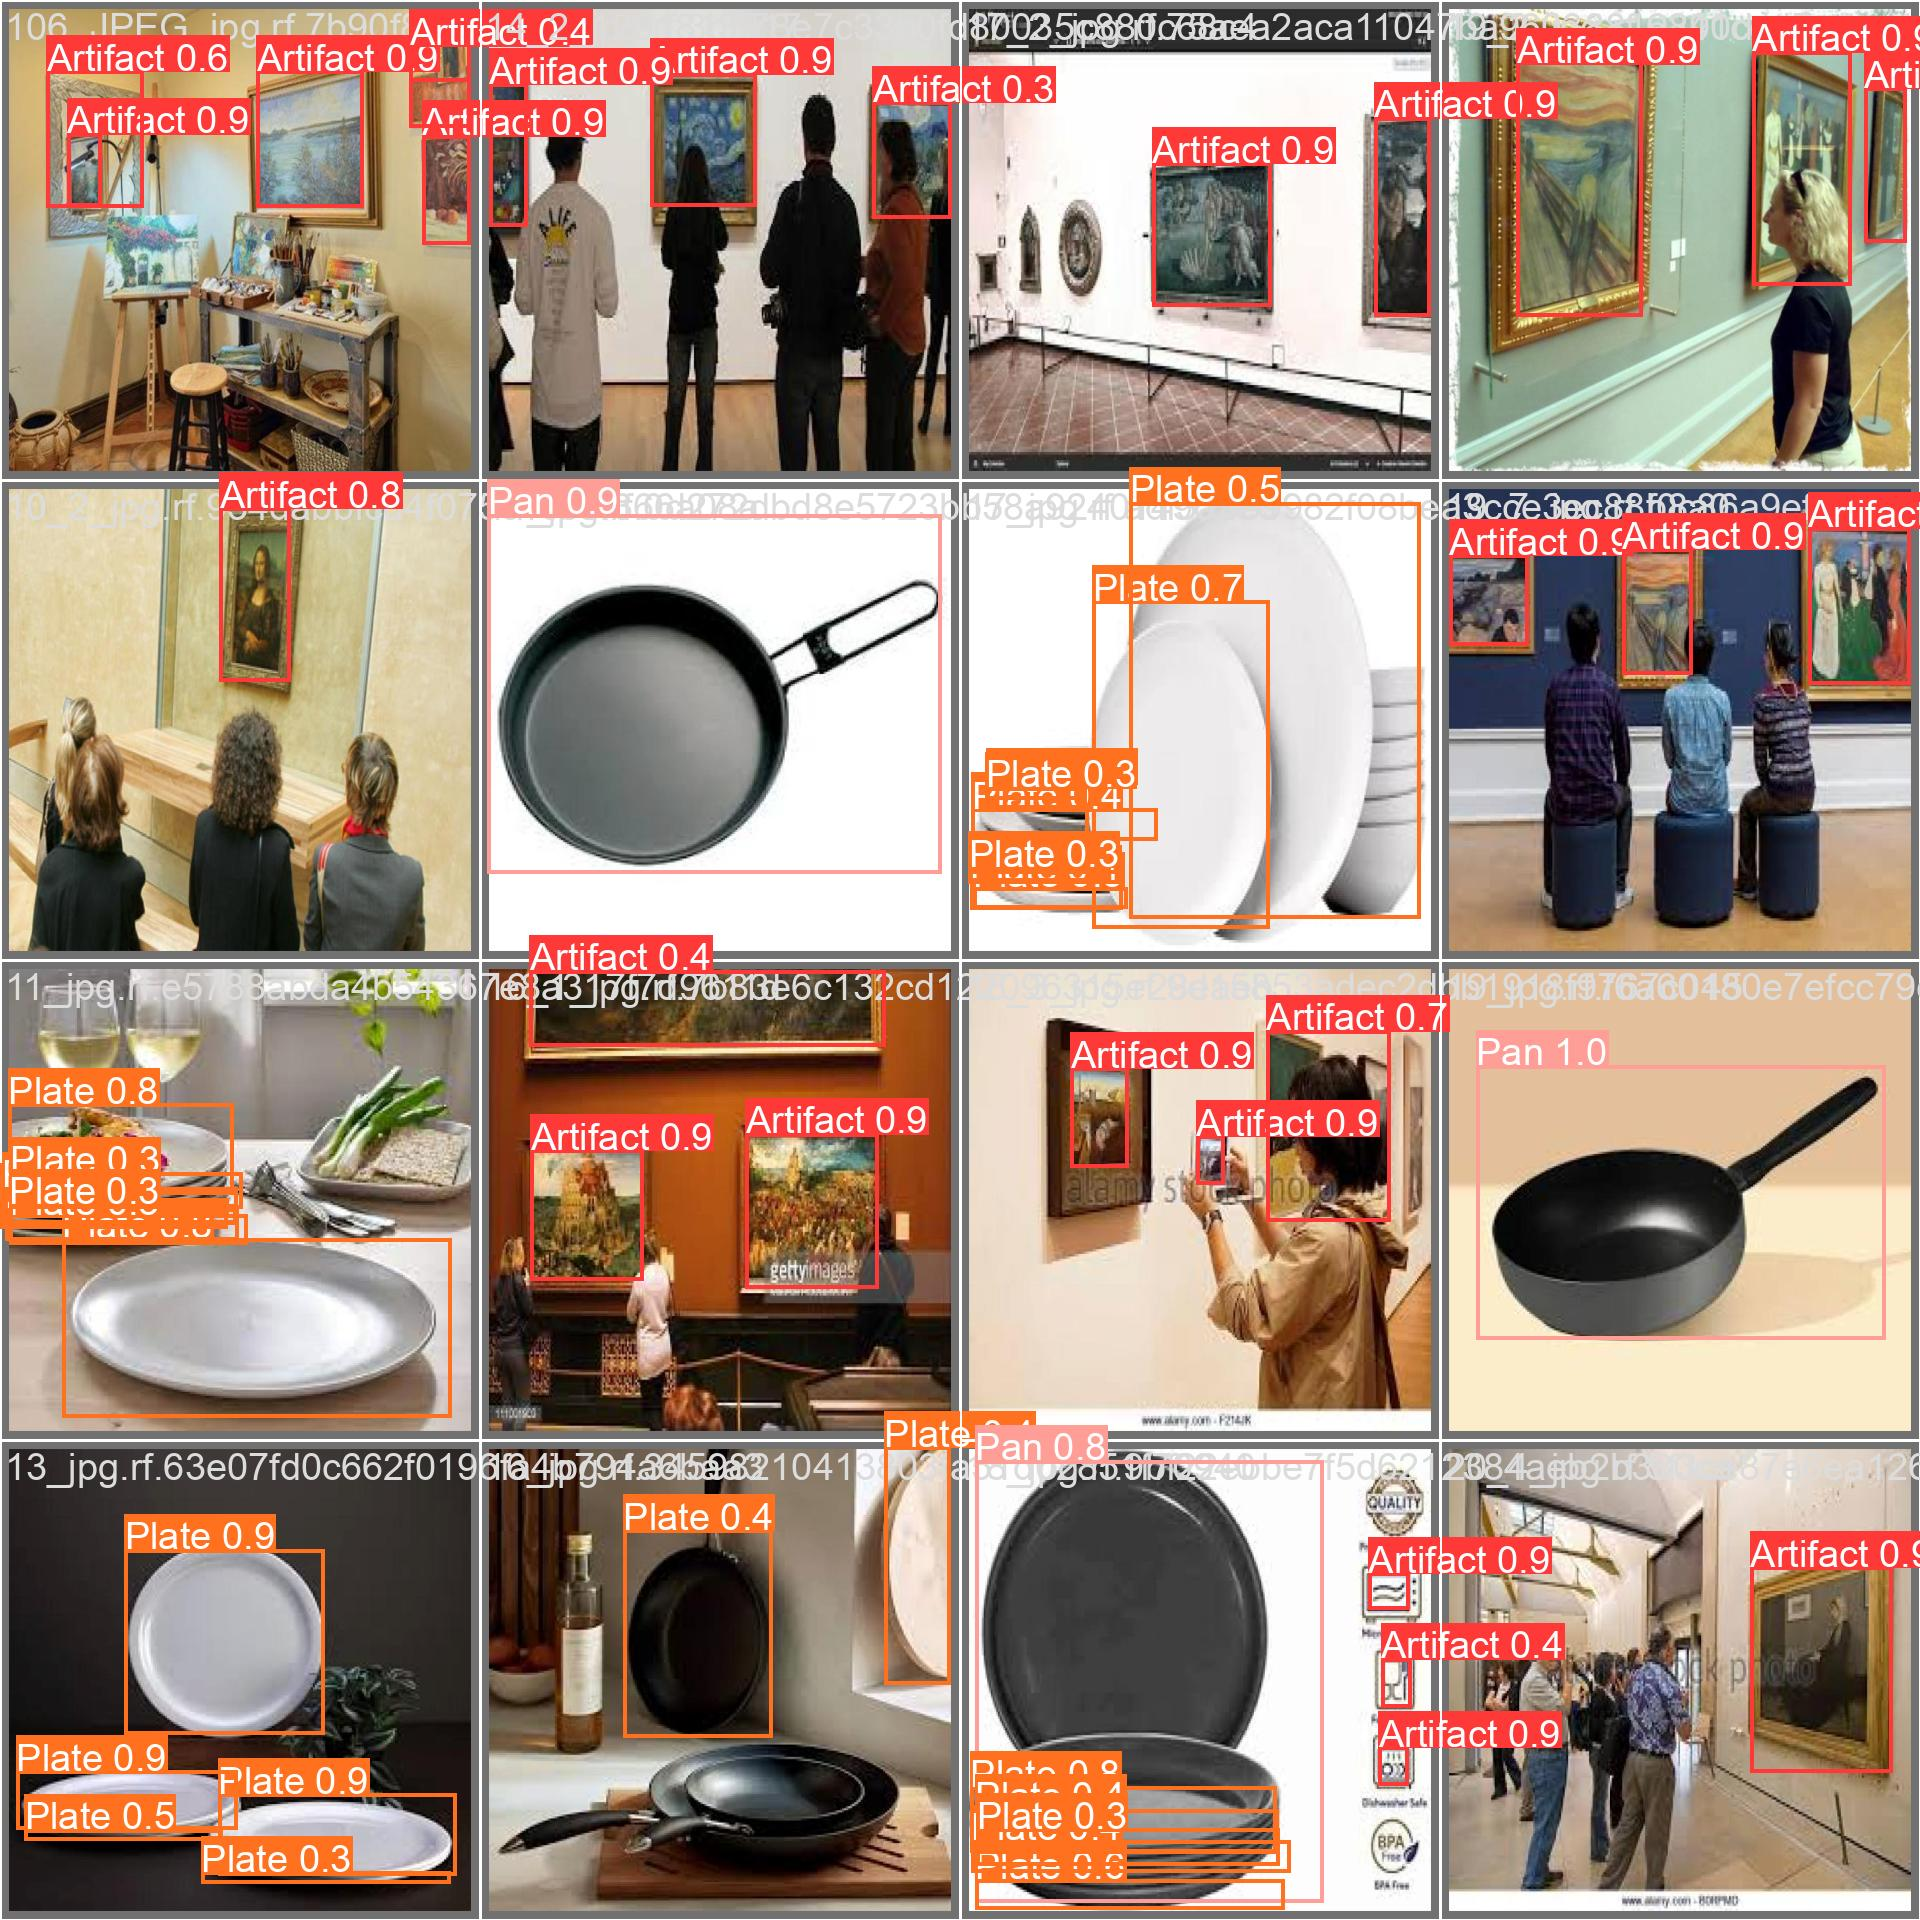

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data='/content/drive/MyDrive/Object Detection Project/Object Detection YOLOv8 (1)/data.yaml'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Object Detection Project/Object Detection YOLOv8 (1)/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:13<00:00,  4.43s/it]
                   all         33         36     0.0496     0.0556     0.0201    0.00711
              Artifact         33         17          0          0          0          0
                   Pan         33          7          0          0     0.0159    0.00637
                 Plate

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Datasets/final dataset/test/images' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/28 /content/drive/MyDrive/Datasets/final dataset/test/images/10_9_jpg.rf.438f7483b7d5bc199e6afcb2ddebb84d.jpg: 800x800 2 Artifacts, 22.2ms
image 2/28 /content/drive/MyDrive/Datasets/final dataset/test/images/11_1_jpg.rf.2655df14ebbfa4b5c7efe8c95139f522.jpg: 800x800 6 Artifacts, 36.0ms
image 3/28 /content/drive/MyDrive/Datasets/final dataset/test/images/126_JPEG_jpg.rf.4a65ed11706a310e4e6269201c2c78b5.jpg: 800x800 1 Artifact, 22.2ms
image 4/28 /content/drive/MyDrive/Datasets/final dataset/test/images/12_4_jpg.rf.084a52e0422833f5fae87957cfe001de.jpg: 800x800 3 Artifacts, 22.2ms
image 5/28 /content/drive/MyDrive/Datasets/final dataset/test/images/13_jpg.rf.f7ab1cdb2e776c53bae2671a14efe06c.jpg: 800x800 1 Pan, 28.3ms
image 6/28 /content/drive/MyDrive/Datasets/final 

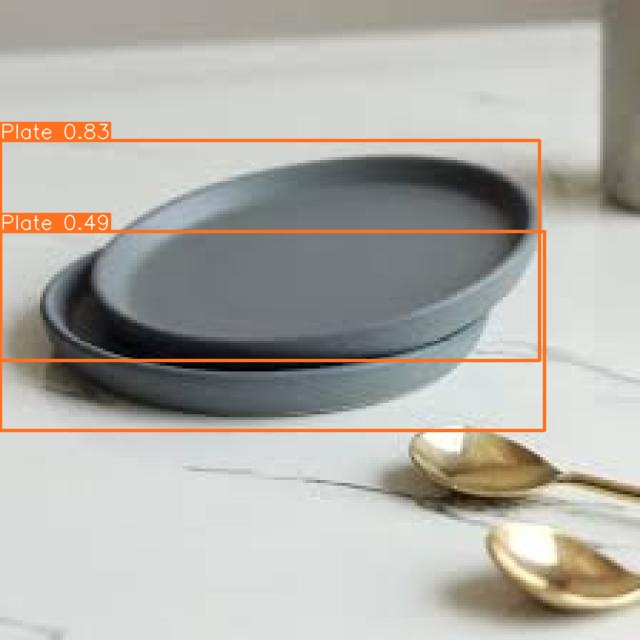

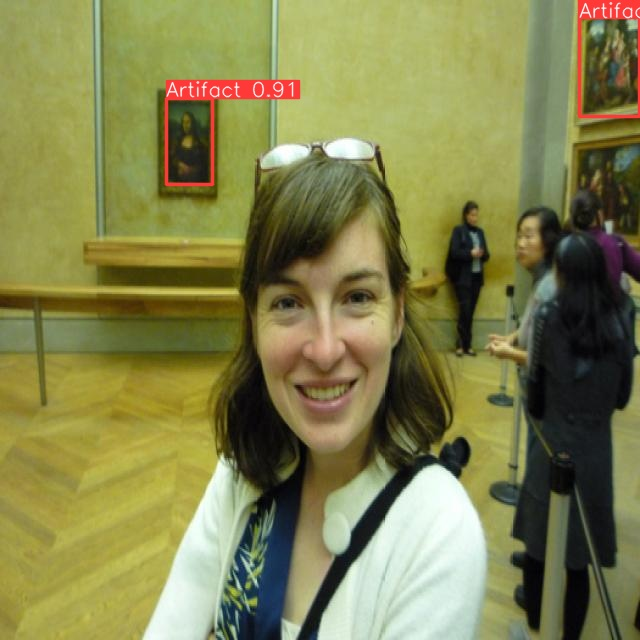

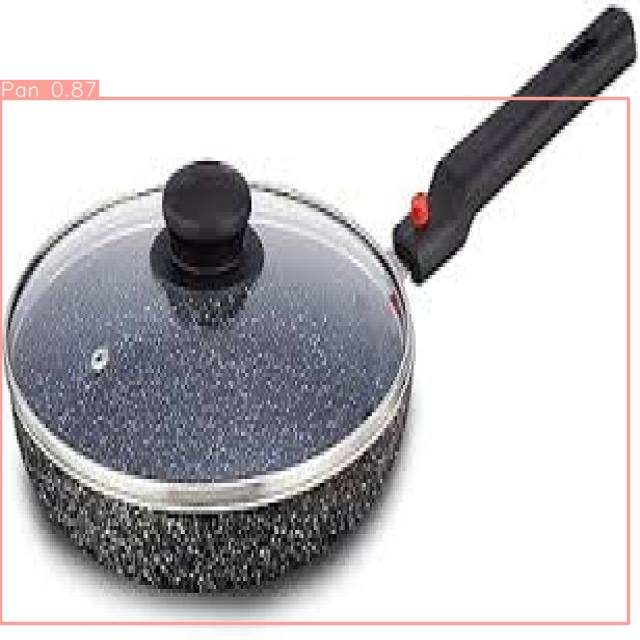

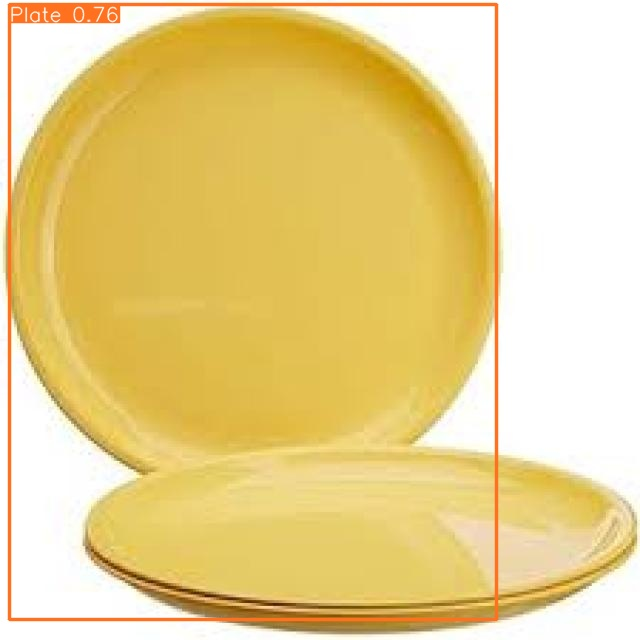

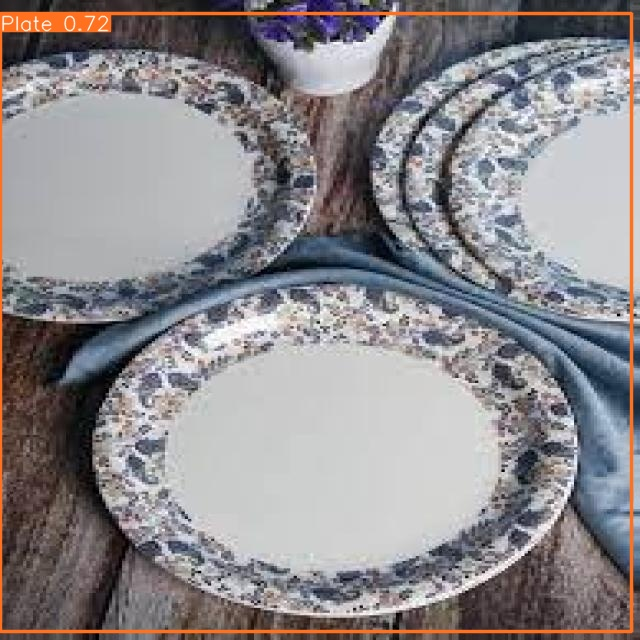

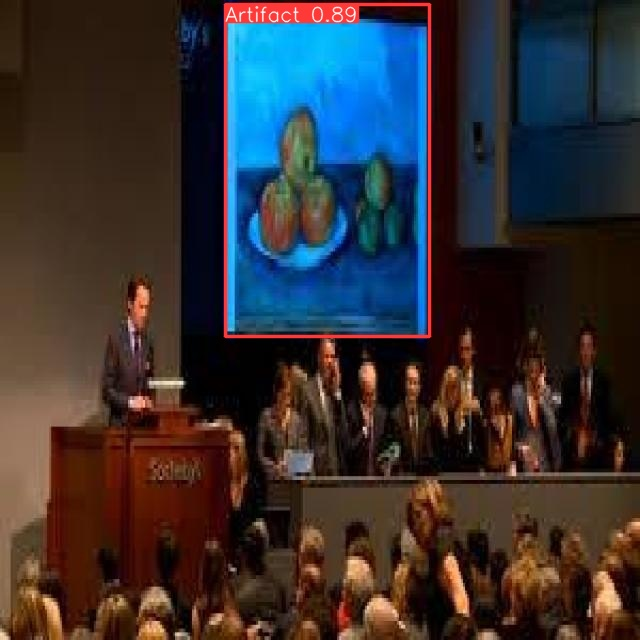

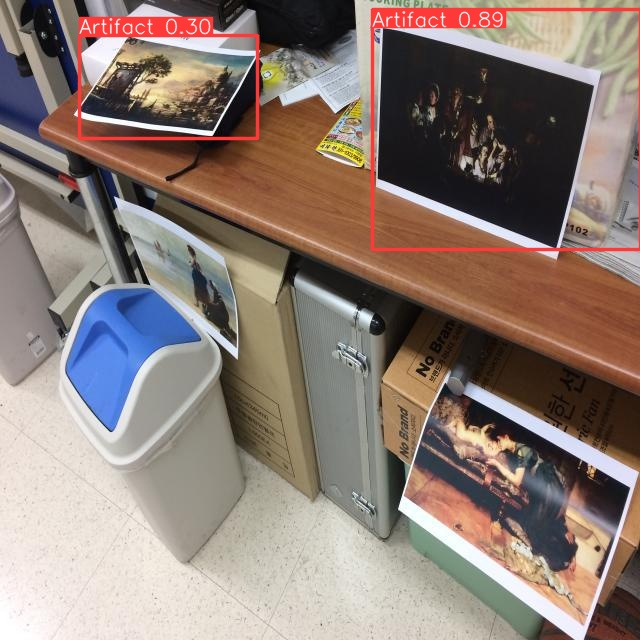

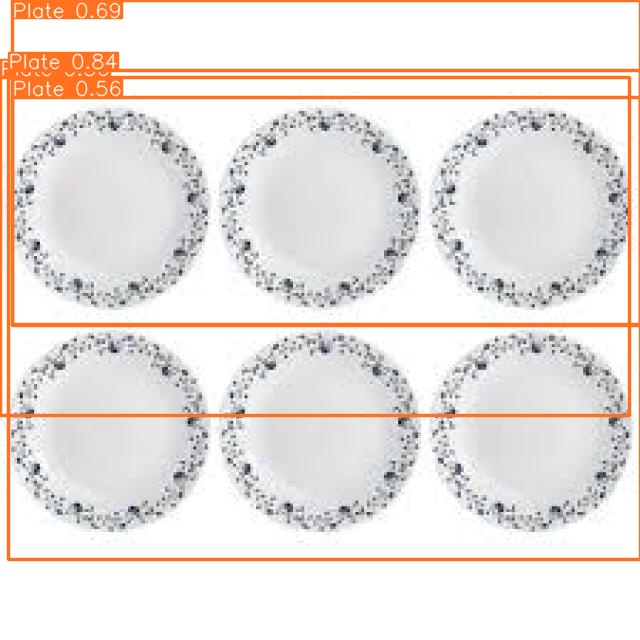

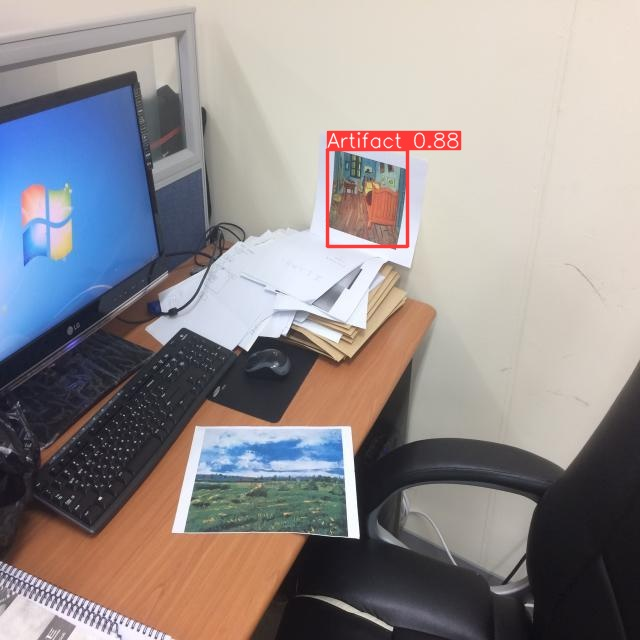

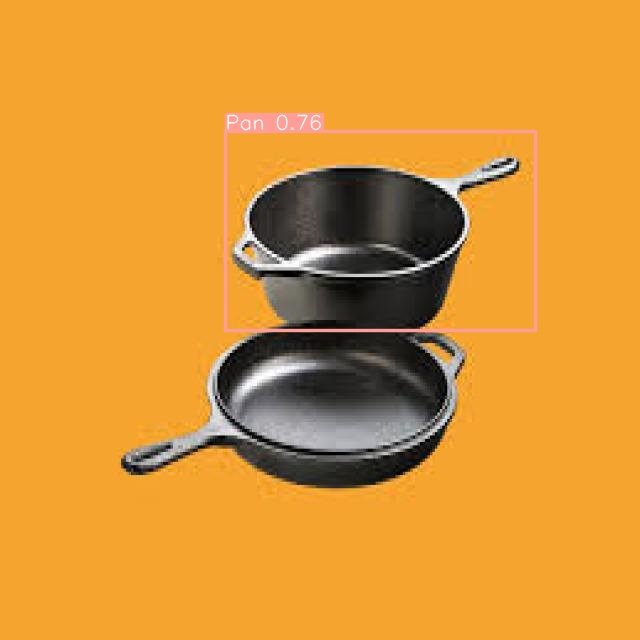

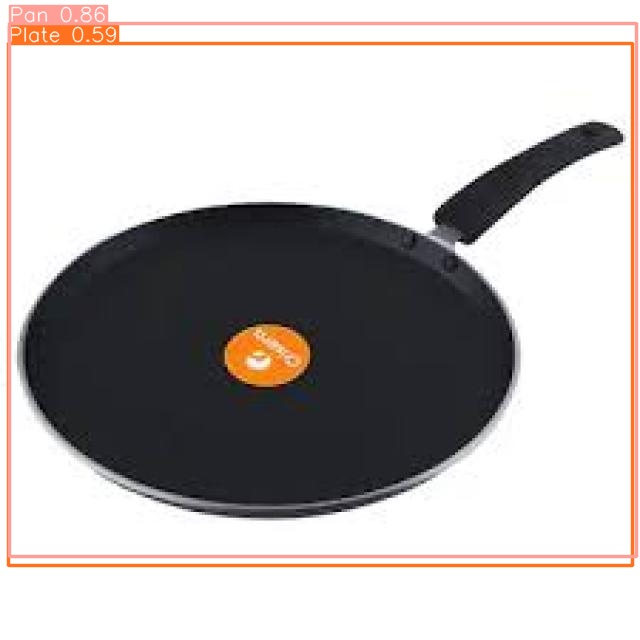

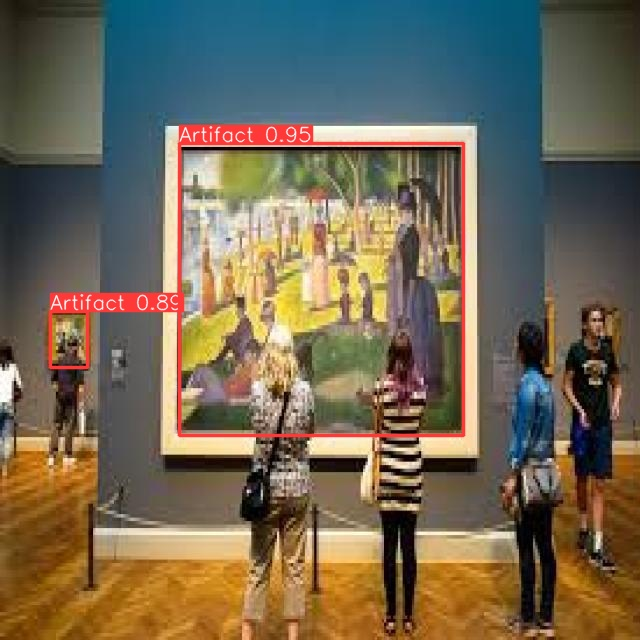

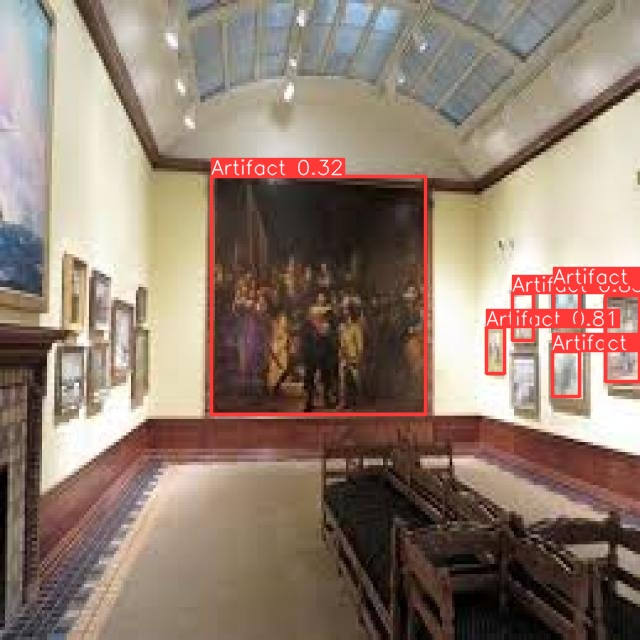

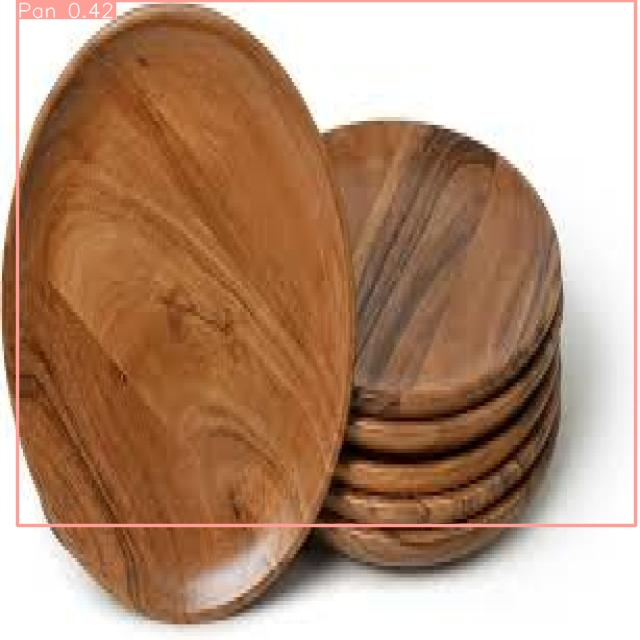

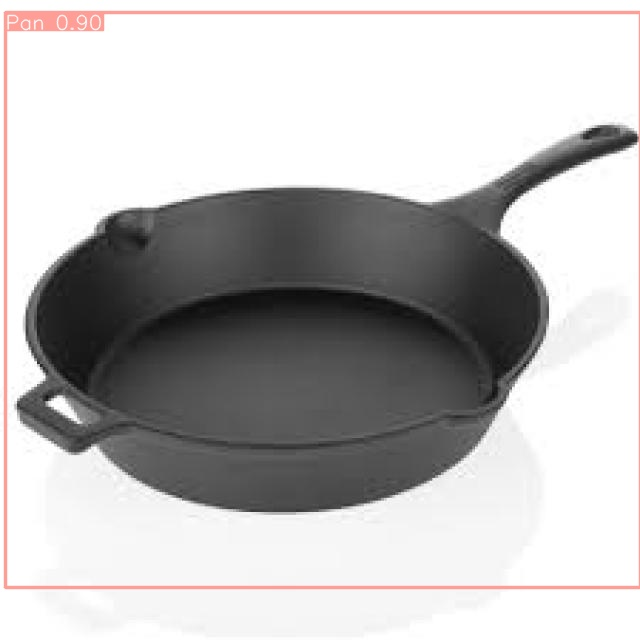

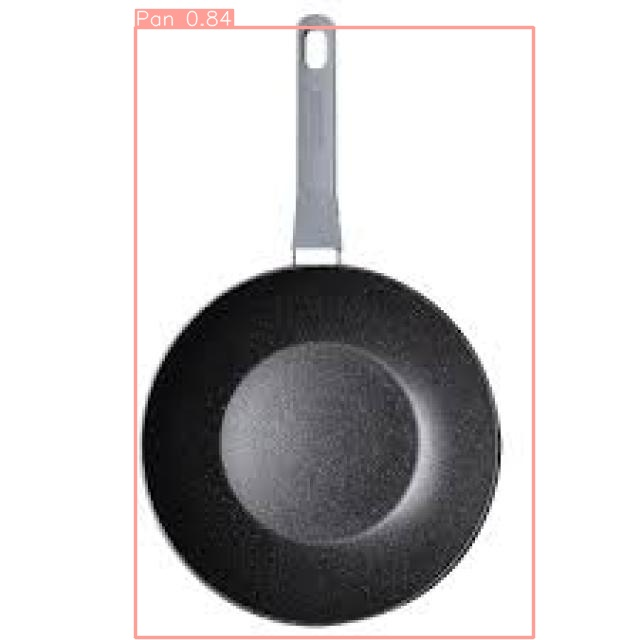

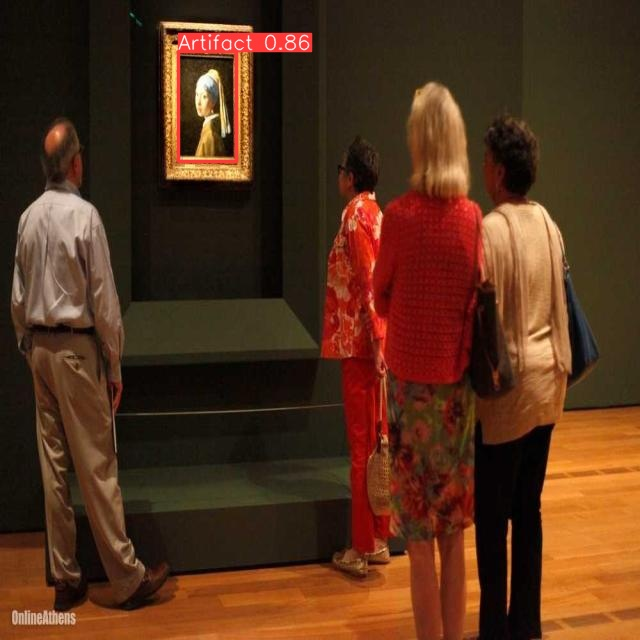

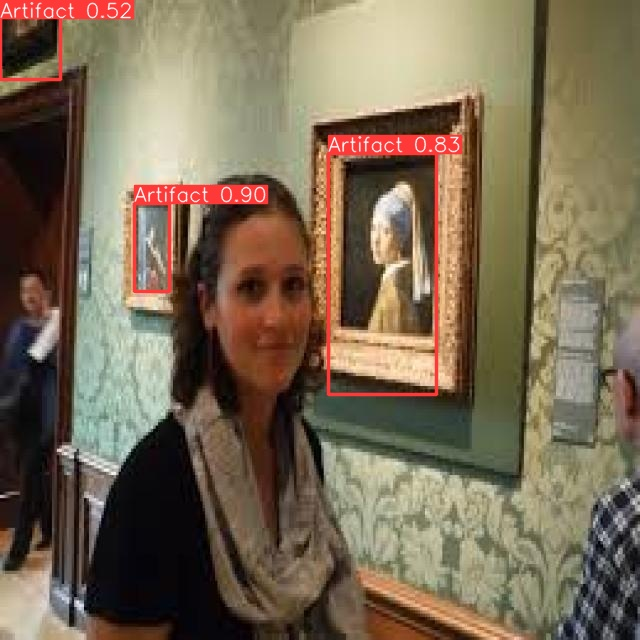

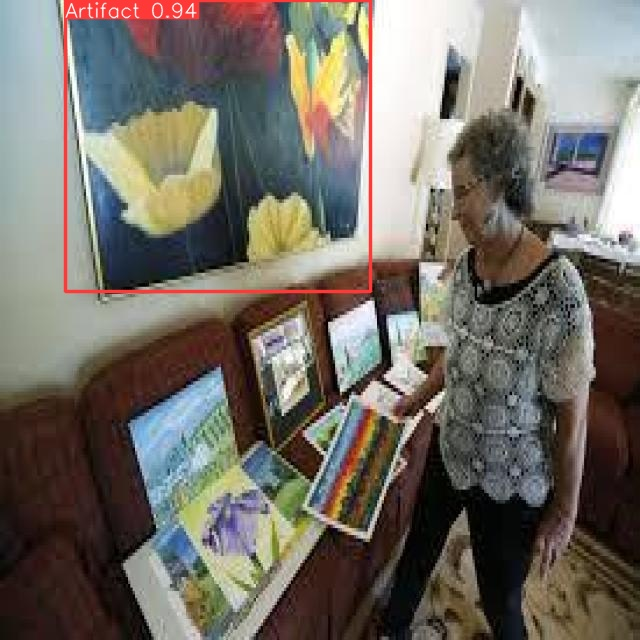

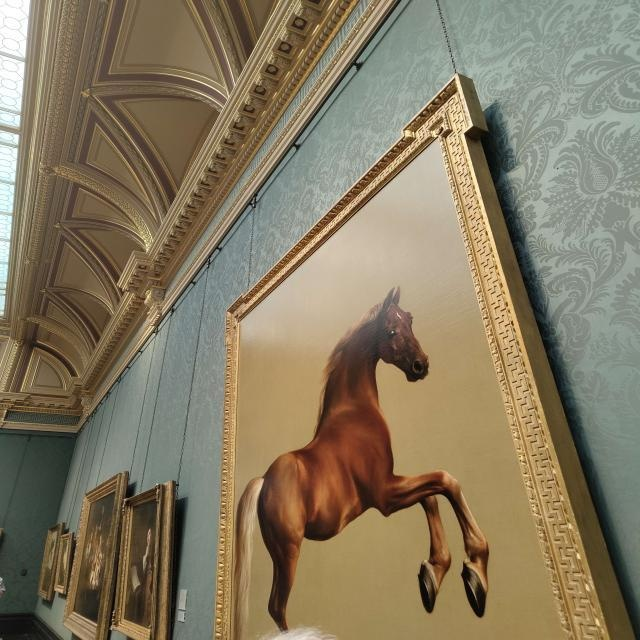

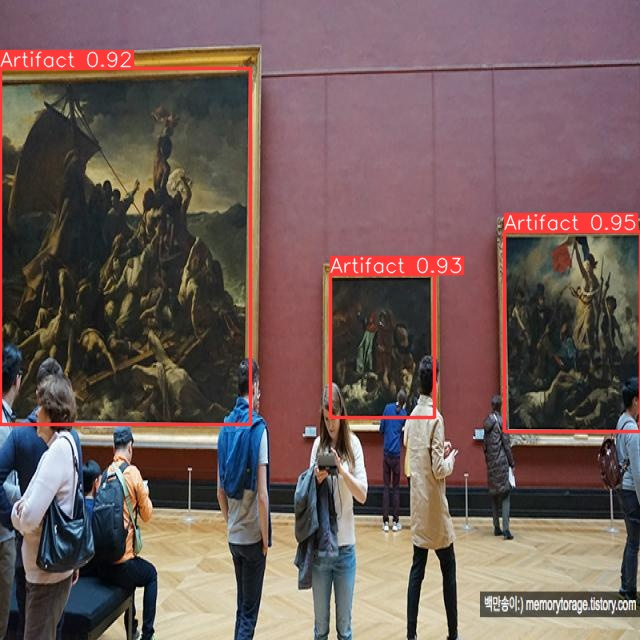

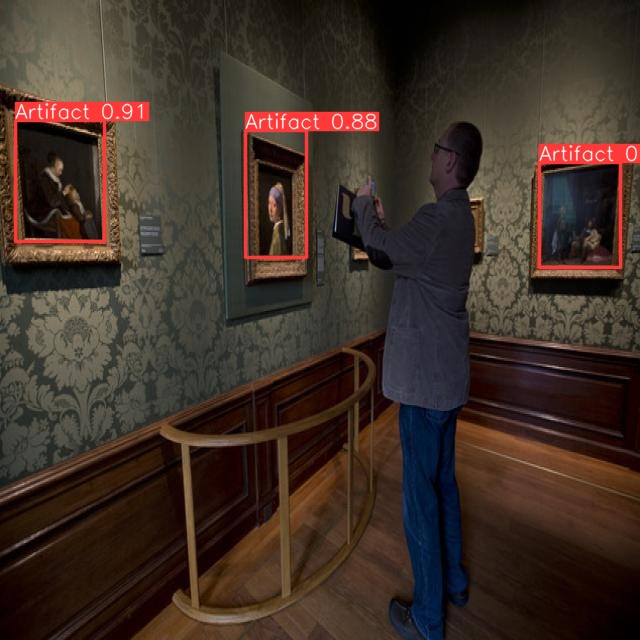

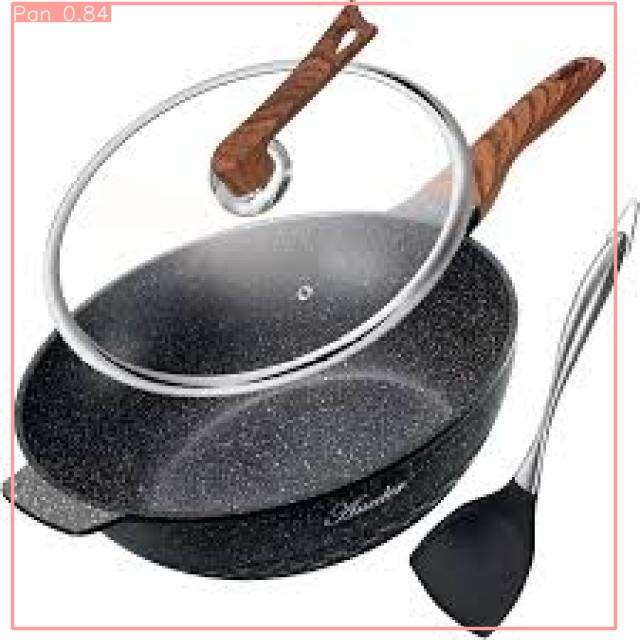

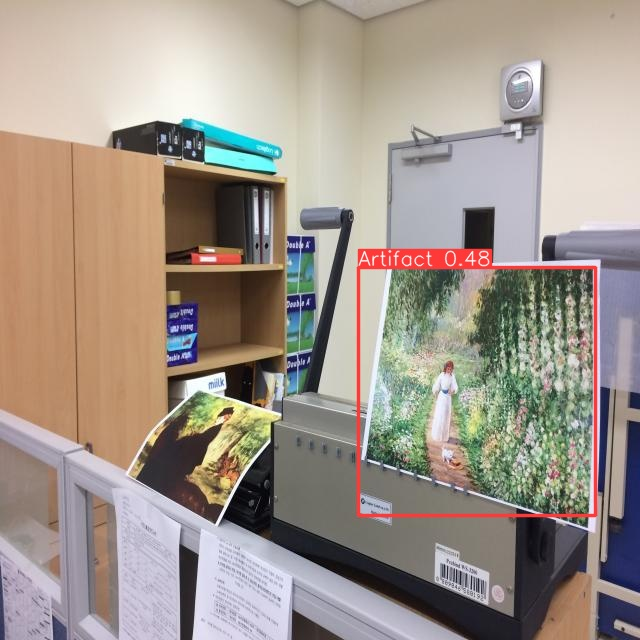

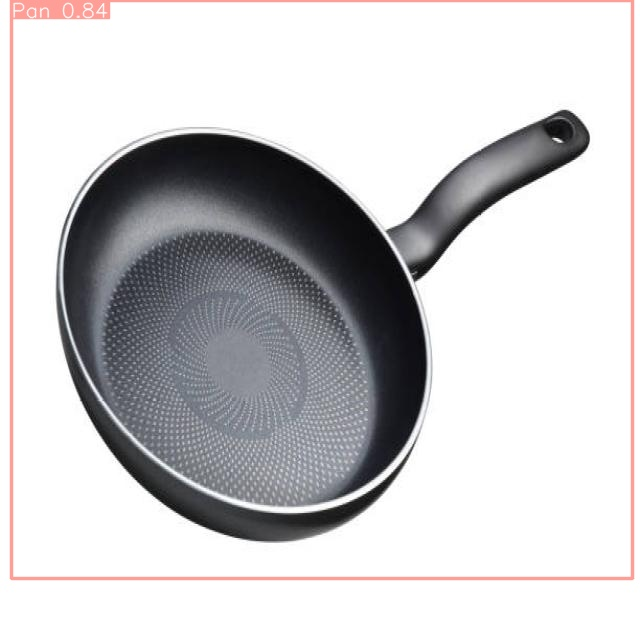

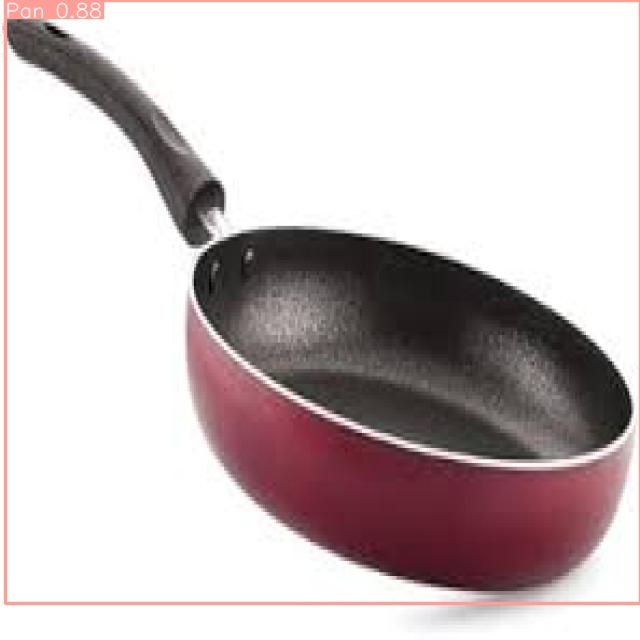

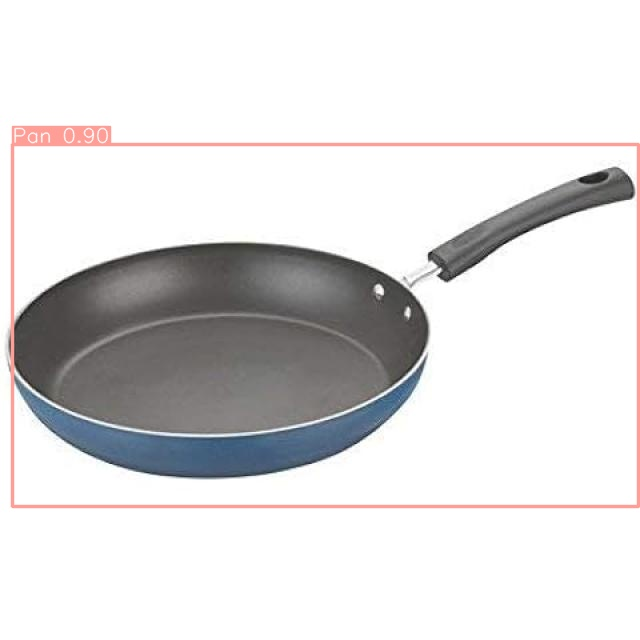

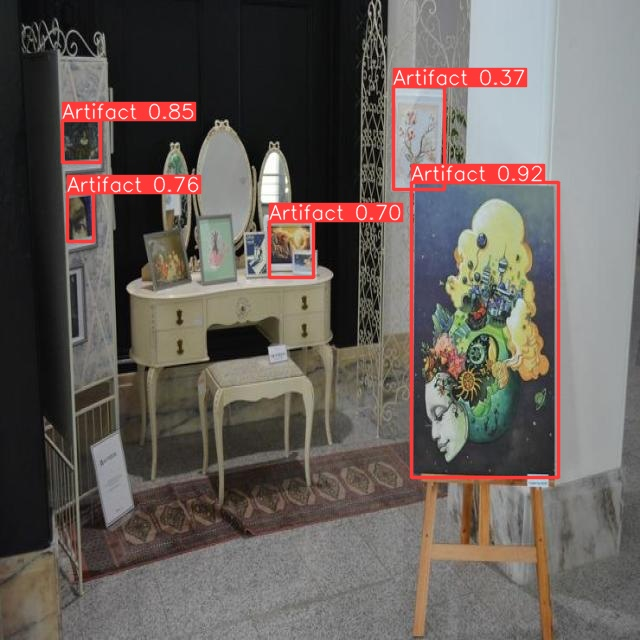

In [ ]:
import glob
from IPython.display import Image, display

# Assuming 'HOME' is defined and points to the directory containing 'predict/'
image_paths = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')
for image_path in image_paths:
    display(Image(filename=image_path, width=600))  # Adjust the width as needed
    print("\n")


In [ ]:
!cp '/content/runs/detect/train/weights/best.pt' '/content/drive/MyDrive/Object Detection Project/Models/best1.pt'

In [ ]:
!cp '/content/runs/detect/train/weights/last.pt' '/content/drive/MyDrive/Object Detection Project/Models/last1.pt'